In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_val_score

import time

In [2]:
# pandas settings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Importing Dataset

In [5]:
# reading data train

data = pd.read_csv("data.csv")

In [6]:
data.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,y
0,0.662810,-0.259196,0,-0.445083,1,0,0.662810,-0.439695,-0.279218,-0.898687,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.665224,-0.259196,0,-0.454841,1,1,-0.665224,-0.439695,-1.016949,-0.898687,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.025001,-0.259196,0,0.088693,1,0,1.025001,-0.439695,-0.859567,-0.898687,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-0.665224,-0.259196,0,-0.455202,0,0,-0.665224,-0.439695,0.183093,-0.898687,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.423764,1.306414,0,-0.372082,1,0,-0.423764,-0.439695,-0.397255,-0.898687,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


## Modelling

### Split Data Train & Test

#### 80 : 20

In [8]:
# categorising feature & label

feature = ['age','education','default','balance','housing','loan','day','month','duration','campaign','previous',
          'contact_cellular','contact_telephone','marital_divorced','marital_married','marital_single',
          'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
          'job_services','job_student','job_technician','job_unemployed']

label   = ['y']

In [9]:
X = data[feature]
y = data['y']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=89)

### Modeling Preparation

#### Evaluation Method

In [14]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [15]:
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [16]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c, solver='liblinear')
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

In [17]:
def draw_learning_curve_knn(param_values):
    train_scores = []
    test_scores = []

    for n in param_values:
        model = KNeighborsClassifier(n_neighbors=n, metric='manhattan')
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(n) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('n-neighbor')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter n-neighbor - KNN')
    plt.legend()
    plt.show()

### Logistic Regresion

#### Without Hyperparameter Tuning

In [83]:
start_time = time.time()

logreg = LogisticRegression(solver='lbfgs',
                            max_iter = 1000,
                            C=1)
logreg.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.6074700355529785 ms


In [31]:
ytrain_pred = logreg.predict(X_train)
ytest_pred  = logreg.predict(X_test)

In [32]:
accuracy_train = accuracy_score(y_train, ytrain_pred)
accuracy_test  = accuracy_score(y_test, ytest_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_test)

Accuracy  (Train Set)    : 0.85
Accuracy  (Test Set)     : 0.85


In [33]:
precision_train = precision_score(y_train, ytrain_pred)
precision_test  = precision_score(y_test, ytest_pred)
print("Precision  (Train Set)    : %.2f" % precision_train)
print("Precision  (Test Set)     : %.2f" % precision_test)

Precision  (Train Set)    : 0.85
Precision  (Test Set)     : 0.85


In [84]:
recall_train = recall_score(y_train, ytrain_pred)
recall_test  = recall_score(y_test, ytest_pred)
print("Recall  (Train Set)    : %.2f" % recall_train)
print("Recall  (Test Set)     : %.2f" % recall_test)

Recall  (Train Set)    : 0.85
Recall  (Test Set)     : 0.84


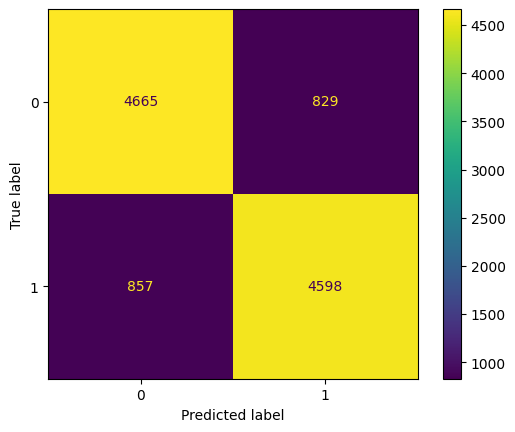

In [34]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

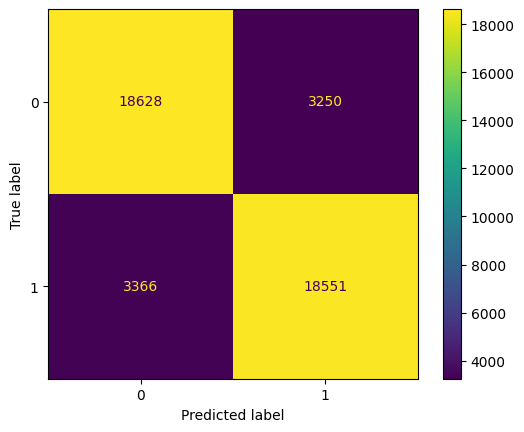

In [35]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

#### With Hyperparameter Tuning

In [38]:
penalty = ['l1', 'l2']
C = [0.0001, 0.05, 1, 10, 50, 100]
max_iter = [210, 1000, 10000]
param_grid = dict(max_iter=max_iter, C=C, penalty=penalty)

In [39]:
start_time = time.time()

logreg = LogisticRegression(solver='liblinear')
logistic_grid = GridSearchCV(logreg, param_grid, cv=10)
logistic_grid.fit(X_train, y_train)

print("Execution time: " + str((time.time() - start_time)) + ' ms')

Execution time: 1029.4422690868378 ms


In [40]:
print("\nBest: %f using %s" % (logistic_grid.best_score_, logistic_grid.best_params_))


Best: 0.848430 using {'C': 50, 'max_iter': 210, 'penalty': 'l1'}


In [41]:
ytrain_loreg_grid_pred = logistic_grid.predict(X_train)
ytest_loreg_grid_pred  = logistic_grid.predict(X_test)

In [42]:
accuracy_logreg_grid_train = accuracy_score(y_train, ytrain_loreg_grid_pred)
accuracy_logreg_grid_test  = accuracy_score(y_test, ytest_loreg_grid_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_logreg_grid_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_logreg_grid_test)

Accuracy  (Train Set)    : 0.85
Accuracy  (Test Set)     : 0.85


In [43]:
precision_logreg_grid_train = precision_score(y_train, ytrain_loreg_grid_pred)
precision_logreg_grid_test  = precision_score(y_test, ytest_loreg_grid_pred)
print("Precision  (Train Set)    : %.2f" % precision_logreg_grid_train)
print("Precision  (Test Set)     : %.2f" % precision_logreg_grid_test)

Precision  (Train Set)    : 0.85
Precision  (Test Set)     : 0.85


In [82]:
recall_logreg_grid_train = recall_score(y_train, ytrain_loreg_grid_pred)
recall_logreg_grid_test  = recall_score(y_test, ytest_loreg_grid_pred)
print("Recall  (Train Set)    : %.2f" % recall_logreg_grid_train)
print("Recall  (Test Set)     : %.2f" % recall_logreg_grid_test)

Recall  (Train Set)    : 0.84
Recall  (Test Set)     : 0.84


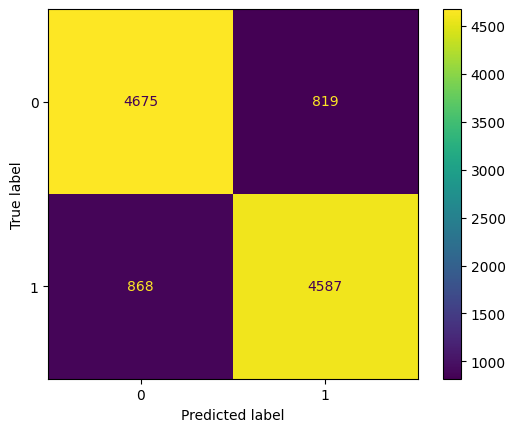

In [44]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_loreg_grid_pred, labels=logistic_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

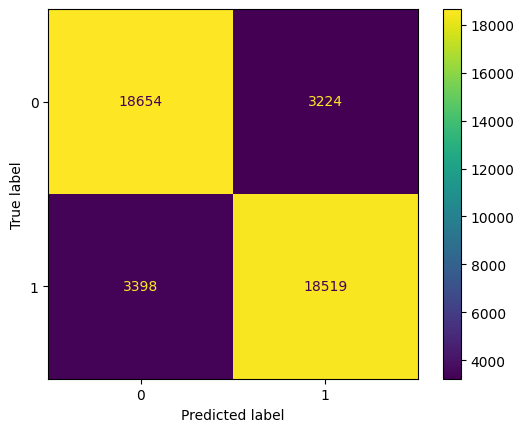

In [45]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_loreg_grid_pred, labels=logistic_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

##### Phase 1 Learning Curve

param value: 1e-12; train: 0.7948216430708508; test: 0.7935811986545109
param value: 52.63157894736937; train: 0.9261012248409712; test: 0.9244805682526093
param value: 105.26315789473773; train: 0.92610210492416; test: 0.9244824701691071
param value: 157.89473684210608; train: 0.9261024281774641; test: 0.9244797340787065
param value: 210.52631578947447; train: 0.9261024844861043; test: 0.9244801011152237
param value: 263.1578947368429; train: 0.9261024844861041; test: 0.9244803346839164
param value: 315.7894736842112; train: 0.9261024636310524; test: 0.9244799009134872
param value: 368.4210526315796; train: 0.9261025908468687; test: 0.9244802345830483
param value: 421.05263157894797; train: 0.9261025470512598; test: 0.9244796673447944
param value: 473.68421052631635; train: 0.9261025679063116; test: 0.9244799676473994
param value: 526.3157894736847; train: 0.9261026242149517; test: 0.9244797674456628
param value: 578.947368421053; train: 0.9261026700960657; test: 0.9244797674456627
pa

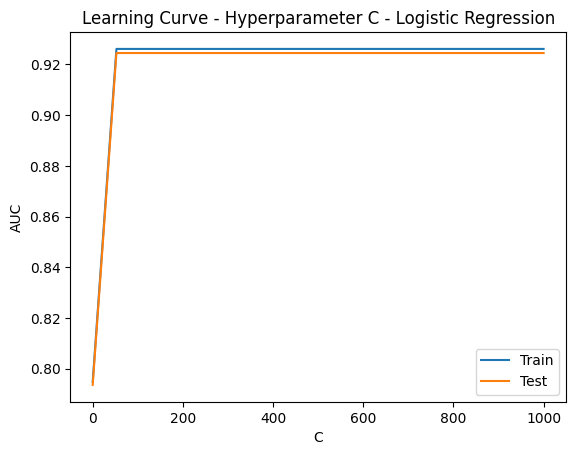

In [46]:
param_values = [float(x) for x in np.linspace(0.000000000001, 1000, 20)]
draw_learning_curve(param_values)

##### Phase 2 Learning Curve

param value: 1e-16; train: 0.7948220466161047; test: 0.7935817992597207
param value: 1.473684210526316e-16; train: 0.5; test: 0.5
param value: 1.9473684210526316e-16; train: 0.7948217494316153; test: 0.793581565691028
param value: 2.4210526315789473e-16; train: 0.7948218839467; test: 0.7935815156405939
param value: 2.894736842105263e-16; train: 0.7948218547496274; test: 0.793580915035384
param value: 3.368421052631579e-16; train: 0.7948216785244391; test: 0.7935816657918964
param value: 3.8421052631578946e-16; train: 0.7948217358758316; test: 0.7935815656910281
param value: 4.3157894736842105e-16; train: 0.7948217045932539; test: 0.7935811652875547
param value: 4.789473684210526e-16; train: 0.7948216712251709; test: 0.7935815990579842
param value: 5.263157894736842e-16; train: 0.7948217244055531; test: 0.7935814322232037
param value: 5.736842105263159e-16; train: 0.7948217536026257; test: 0.7935813821727694
param value: 6.210526315789473e-16; train: 0.7948216816526967; test: 0.79358093

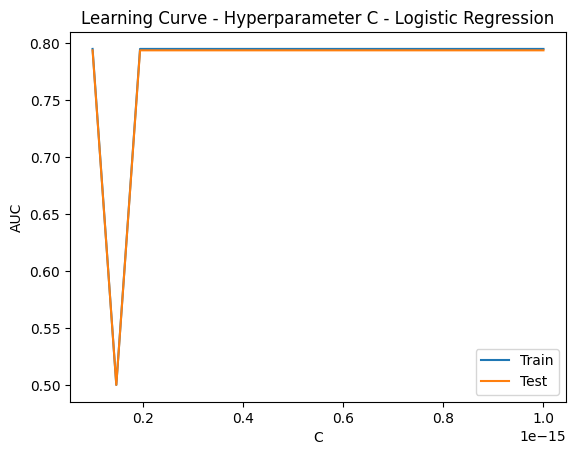

In [47]:
param_values = [float(x) for x in np.linspace(0.0000000000000001, 0.000000000000001, 20)]
draw_learning_curve(param_values)

#### Best Result Implementation From Learning Curve

In [48]:
start_time = time.time()

logreg_best = LogisticRegression(solver='liblinear', 
                            penalty='l1',
                            max_iter=210,
                            C=0.2)
logreg_best.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 2.260185956954956 ms


In [49]:
ytrain_loreg_best_pred = logreg_best.predict(X_train)
ytest_loreg_best_pred  = logreg_best.predict(X_test)

In [50]:
accuracy_logreg_best_train = accuracy_score(y_train, ytrain_loreg_best_pred)
accuracy_logreg_best_test  = accuracy_score(y_test, ytest_loreg_best_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_logreg_best_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_logreg_best_test)

Accuracy  (Train Set)    : 0.85
Accuracy  (Test Set)     : 0.85


In [51]:
precision_logreg_best_train = precision_score(y_train, ytrain_loreg_best_pred)
precision_logreg_best_test  = precision_score(y_test, ytest_loreg_best_pred)
print("Precision  (Train Set)    : %.2f" % precision_logreg_best_train)
print("Precision  (Test Set)     : %.2f" % precision_logreg_best_test)

Precision  (Train Set)    : 0.85
Precision  (Test Set)     : 0.85


In [85]:
recall_logreg_best_train = recall_score(y_train, ytrain_loreg_best_pred)
recall_logreg_best_test  = recall_score(y_test, ytest_loreg_best_pred)
print("Recall  (Train Set)    : %.2f" % recall_logreg_best_train)
print("Recall  (Test Set)     : %.2f" % recall_logreg_best_test)

Recall  (Train Set)    : 0.85
Recall  (Test Set)     : 0.84


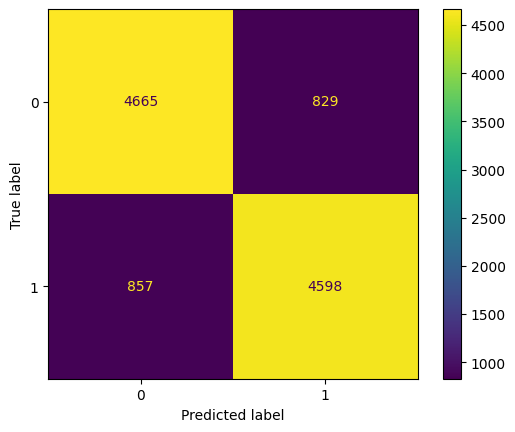

In [52]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_loreg_best_pred, labels=logreg_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_best.classes_)
disp.plot()
plt.show()

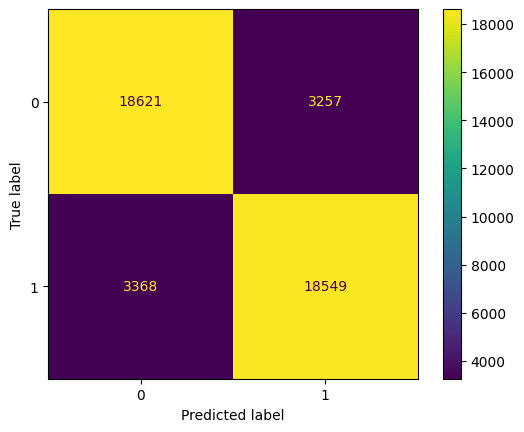

In [53]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_loreg_best_pred, labels=logreg_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_best.classes_)
disp.plot()
plt.show()

#### Feature Importance

In [54]:
kolom = X_train.columns.to_list()
nilai = logistic_grid.best_estimator_.coef_

In [55]:
output = pd.DataFrame({'kolom':kolom,
                      'nilai':nilai[0]})
output.sort_values('nilai', ascending=False).T

,10,8,1,3,6,7,0,9,5,4,2,11,12,14,15,24,13,16,25,20,17,23,26,19,22,21,18
kolom,previous,duration,education,balance,day,month,age,campaign,loan,housing,default,contact_cellular,contact_telephone,marital_married,marital_single,job_student,marital_divorced,job_admin.,job_technician,job_management,job_blue-collar,job_services,job_unemployed,job_housemaid,job_self-employed,job_retired,job_entrepreneur
nilai,1.263447,0.852403,0.402507,0.017749,-0.001528,-0.044263,-0.230445,-0.43628,-1.933103,-2.109839,-3.479073,-5.944022,-7.065357,-7.523635,-7.534704,-7.93574,-8.061746,-8.266141,-8.650432,-8.670609,-9.022174,-9.101517,-9.690702,-9.759655,-9.828116,-10.637946,-11.284897


### K-NN

#### Without Hyperparameter Tuning

In [56]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.016339778900146484 ms


In [57]:
ytrain_knn_pred = knn.predict(X_train)
ytest_knn_pred  = knn.predict(X_test)

In [58]:
accuracy_knn_train = accuracy_score(y_train, ytrain_knn_pred)
accuracy_knn_test  = accuracy_score(y_test, ytest_knn_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_test)

Accuracy  (Train Set)    : 0.94
Accuracy  (Test Set)     : 0.91


In [59]:
precision_knn_train = precision_score(y_train, ytrain_knn_pred)
precision_knn_test  = precision_score(y_test, ytest_knn_pred)
print("Precision  (Train Set)    : %.2f" % precision_knn_train)
print("Precision  (Test Set)     : %.2f" % precision_knn_test)

Precision  (Train Set)    : 0.89
Precision  (Test Set)     : 0.85


In [86]:
recall_knn_train = recall_score(y_train, ytrain_knn_pred)
recall_knn_test  = recall_score(y_test, ytest_knn_pred)
print("Recall  (Train Set)    : %.2f" % recall_knn_train)
print("Recall  (Test Set)     : %.2f" % recall_knn_test)

Recall  (Train Set)    : 0.99
Recall  (Test Set)     : 0.99


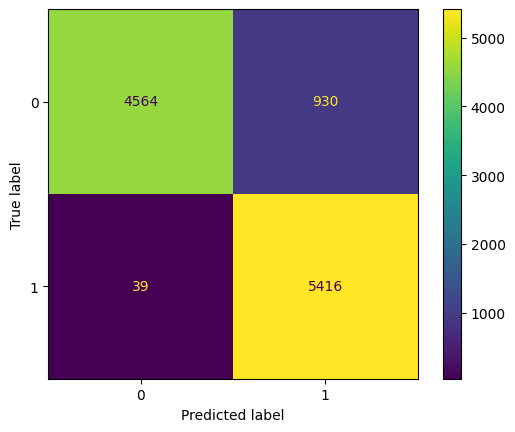

In [60]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

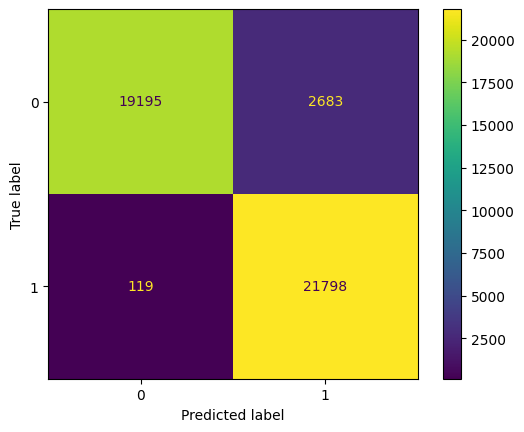

In [61]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

#### With Hyperparameter Tuning

In [62]:
n_neighbors = [10, 50, 100, 250, 450]
metric = ['euclidean', 'manhattan']
param_grid = dict(metric=metric, n_neighbors=n_neighbors)

In [63]:
start_time = time.time()

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, cv=10)
knn_grid.fit(X_train, y_train)

print("Execution time: " + str((time.time() - start_time)) + ' ms')

Execution time: 63.6315062046051 ms


In [64]:
print("\nBest: %f using %s" % (knn_grid.best_score_, knn_grid.best_params_))


Best: 0.918187 using {'metric': 'manhattan', 'n_neighbors': 10}


In [65]:
ytrain_knn_grid_pred = knn_grid.predict(X_train)
ytest_knn_grid_pred  = knn_grid.predict(X_test)

In [66]:
accuracy_knn_grid_train = accuracy_score(y_train, ytrain_knn_grid_pred)
accuracy_knn_grid_test  = accuracy_score(y_test, ytest_knn_grid_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_grid_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_grid_test)

Accuracy  (Train Set)    : 0.94
Accuracy  (Test Set)     : 0.92


In [67]:
precision_knn_grid_train = precision_score(y_train, ytrain_knn_grid_pred)
precision_knn_grid_test  = precision_score(y_test, ytest_knn_grid_pred)
print("Precision  (Train Set)    : %.2f" % precision_knn_grid_train)
print("Precision  (Test Set)     : %.2f" % precision_knn_grid_test)

Precision  (Train Set)    : 0.89
Precision  (Test Set)     : 0.87


In [87]:
recall_knn_grid_train = recall_score(y_train, ytrain_knn_grid_pred)
recall_knn_grid_test  = recall_score(y_test, ytest_knn_grid_pred)
print("Recall  (Train Set)    : %.2f" % recall_knn_grid_train)
print("Recall  (Test Set)     : %.2f" % recall_knn_grid_test)

Recall  (Train Set)    : 0.99
Recall  (Test Set)     : 0.98


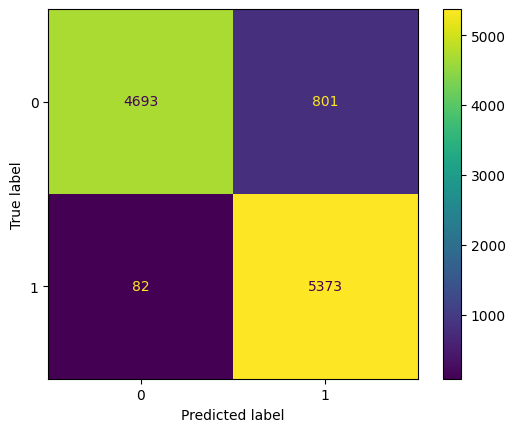

In [68]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_knn_grid_pred, labels=knn_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_grid.classes_)
disp.plot()
plt.show()

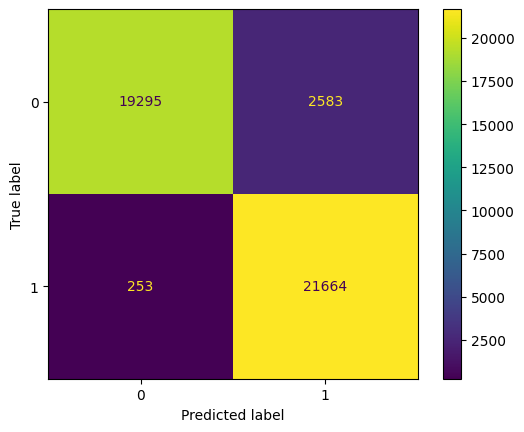

In [69]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_knn_grid_pred, labels=knn_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_grid.classes_)
disp.plot()
plt.show()

##### Phase 1 Learning Curve

param value: 10; train: 0.9925588945517816; test: 0.9767783002672359
param value: 14; train: 0.9884248038758596; test: 0.9757770246485041
param value: 19; train: 0.9837050658042997; test: 0.9729803231723166
param value: 24; train: 0.9790185581723915; test: 0.9686790889619774
param value: 28; train: 0.9755968187169987; test: 0.9658549765313514
param value: 33; train: 0.971710106495363; test: 0.9624928553005245
param value: 38; train: 0.9682281574624654; test: 0.9593595312876942
param value: 43; train: 0.9650709820668535; test: 0.9562470783059063
param value: 47; train: 0.9628140900634508; test: 0.9541684504085284
param value: 52; train: 0.9601166434312887; test: 0.9519616600327597
param value: 57; train: 0.9576202426274232; test: 0.9499105098237324
param value: 62; train: 0.9555121524618745; test: 0.9476924581002791
param value: 66; train: 0.9537567775321085; test: 0.9459698556245176
param value: 71; train: 0.9517551816034351; test: 0.9441629014837284
param value: 76; train: 0.949896052

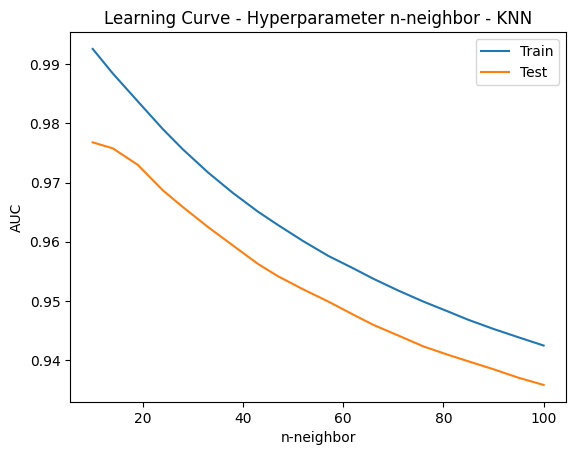

In [70]:
param_values = [int(x) for x in np.linspace(10, 100, 20)]
draw_learning_curve_knn(param_values)

##### Phase 2 Learning Curve

param value: 250; train: 0.9204524223628671; test: 0.9158834218614291
param value: 260; train: 0.9196698323703881; test: 0.915162612192219
param value: 271; train: 0.918885434244912; test: 0.9142585845670488
param value: 281; train: 0.9181856419366197; test: 0.9135761969477911
param value: 292; train: 0.9174560154338729; test: 0.9129101424535457
param value: 302; train: 0.9167993326033037; test: 0.9123399512241837
param value: 313; train: 0.916162595544344; test: 0.9117554622541314
param value: 323; train: 0.9156287541830594; test: 0.91118029934831
param value: 334; train: 0.9150416229504807; test: 0.9107633124978938
param value: 344; train: 0.9145830391293787; test: 0.9103221512877808
param value: 355; train: 0.9140397483440912; test: 0.9097139384119397
param value: 365; train: 0.9135760529497754; test: 0.9092379587831336
param value: 376; train: 0.9130830489083124; test: 0.9089065748585992
param value: 386; train: 0.9126623462034293; test: 0.9084690840136578
param value: 397; train: 

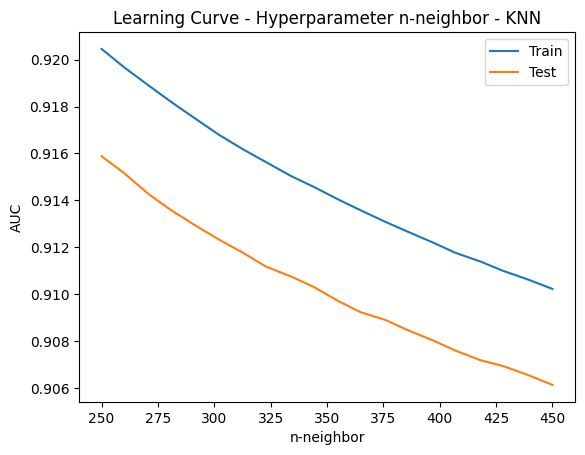

In [71]:
param_values = [int(x) for x in np.linspace(250, 450, 20)]
draw_learning_curve_knn(param_values)

#### Best Result Implementation From Learning Curve

In [76]:
start_time = time.time()

knn_best = KNeighborsClassifier(n_neighbors=45, metric='manhattan')
knn_best.fit(X_train, y_train)

print("\nExecution time: " + str((time.time() - start_time)) + ' ms')


Execution time: 0.008035898208618164 ms


In [77]:
ytrain_knn_best_pred = knn_best.predict(X_train)
ytest_knn_best_pred  = knn_best.predict(X_test)

In [78]:
accuracy_knn_best_train = accuracy_score(y_train, ytrain_knn_best_pred)
accuracy_knn_best_test  = accuracy_score(y_test, ytest_knn_best_pred)
print("Accuracy  (Train Set)    : %.2f" % accuracy_knn_best_train)
print("Accuracy  (Test Set)     : %.2f" % accuracy_knn_best_test)

Accuracy  (Train Set)    : 0.88
Accuracy  (Test Set)     : 0.87


In [79]:
precision_knn_best_train = precision_score(y_train, ytrain_knn_best_pred)
precision_knn_best_test  = precision_score(y_test, ytest_knn_best_pred)
print("Precision  (Train Set)    : %.2f" % precision_knn_best_train)
print("Precision  (Test Set)     : %.2f" % precision_knn_best_test)

Precision  (Train Set)    : 0.83
Precision  (Test Set)     : 0.82


In [88]:
recall_knn_best_train = recall_score(y_train, ytrain_knn_best_pred)
recall_knn_best_test  = recall_score(y_test, ytest_knn_best_pred)
print("Recall  (Train Set)    : %.2f" % recall_knn_best_train)
print("Recall  (Test Set)     : %.2f" % recall_knn_best_test)

Recall  (Train Set)    : 0.96
Recall  (Test Set)     : 0.95


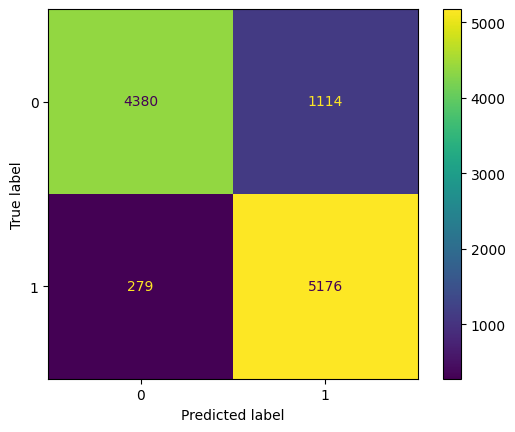

In [80]:
# test prediction confusion matrix

cm = confusion_matrix(y_test, ytest_knn_best_pred, labels=knn_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot()
plt.show()

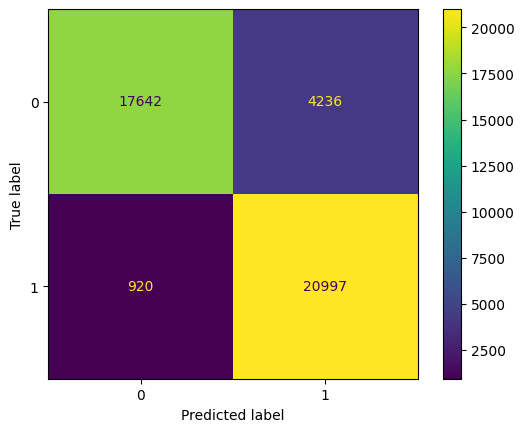

In [81]:
# train prediction confusion matrix

cm = confusion_matrix(y_train, ytrain_knn_best_pred, labels=knn_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot()
plt.show()